<a href="https://colab.research.google.com/github/comparativechrono/microscoPi/blob/main/mjpeg2mp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting Raspberry Pi mjpeg to mp4 videos using ffmpeg

In [4]:
! apt install ffmpeg

^C


In [5]:
pip install ffmpeg-python

In [18]:
import ffmpeg

def convert_mjpeg_to_mp4(input_file, output_file):
    (
        ffmpeg
        .input(input_file, format='mjpeg')
        .output(output_file, vcodec='libx264')
        .run()
    )

input_file = 'heart6_2ir.mjpeg'
output_file = 'output6_2ir.mp4'

convert_mjpeg_to_mp4(input_file, output_file)


In [15]:
pip install opencv-python numpy matplotlib scipy


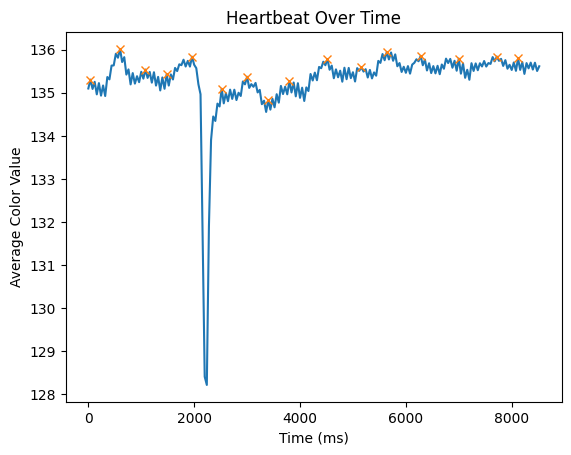

Estimated Beats Per Minute: 120.0


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the video
cap = cv2.VideoCapture('heart4i2r.mjpeg')

average_colors = []
timestamps = []

# Process the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Compute the average color
    average_color = np.mean(frame, axis=(0, 1))
    average_colors.append(np.mean(average_color))
    timestamps.append(cap.get(cv2.CAP_PROP_POS_MSEC))

cap.release()

# Convert to numpy array for analysis
average_colors = np.array(average_colors)
timestamps = np.array(timestamps)

# Determine number of frames to clip
total_frames = len(average_colors)
frames_to_clip = int(total_frames * 0.2)  # 20% of the total frames

# Clip the initial noisy data
average_colors = average_colors[frames_to_clip:]
timestamps = timestamps[frames_to_clip:]

# Adjust timestamps after clipping
timestamps -= timestamps[0]

# Find peaks for heartbeat
peaks, _ = find_peaks(average_colors, distance=10)
# distance is crucial for accurate peak detection. It represents the minimum horizontal distance (in terms of number of frames) expected between peaks.
# You may need to experiment with this value based on the frame rate of the video and the expected rate of heartbeats.

# Plotting
plt.plot(timestamps, average_colors)
plt.plot(timestamps[peaks], average_colors[peaks], "x")
plt.title("Heartbeat Over Time")
plt.xlabel("Time (ms)")
plt.ylabel("Average Color Value")
plt.show()

# Calculate BPM
bpm = len(peaks) * 7.5
print(f"Estimated Beats Per Minute: {bpm}")
